In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras import layers, models, preprocessing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 224
CHANNELS = 3
EPOCHS = 30

In [3]:
train_ds = preprocessing.image_dataset_from_directory(
   r"C:\Users\Hp\Desktop\New folder\Amit\2_Rice_Pest_Classification\train_aug",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 28287 files belonging to 7 classes.


In [4]:
val_ds = preprocessing.image_dataset_from_directory(
    r"C:\Users\Hp\Desktop\New folder\Amit\2_Rice_Pest_Classification\valid",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)
test_ds = preprocessing.image_dataset_from_directory(
   r"C:\Users\Hp\Desktop\New folder\Amit\2_Rice_Pest_Classification\test",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 736 files belonging to 7 classes.
Found 726 files belonging to 7 classes.


In [5]:
class_names = train_ds.class_names
class_names

['Demsel Fly',
 'Gundhi Bug',
 'Hispa',
 'Leaf Folder (Larva )',
 'Pyrilla Perpusilla',
 'Stem Borer',
 'Stem Borer (eggs)']

In [6]:
# Load the pre-trained InceptionV3 model without the top classification layer
base_model = InceptionV3(input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS),
                         include_top=False,
                         weights='imagenet')

In [7]:
# Freeze the convolutional base
base_model.trainable = False

In [8]:
# Add custom classification layers on top of the base model
inputs = tf.keras.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS))
x = tf.keras.applications.inception_v3.preprocess_input(inputs)  # Preprocess input according to InceptionV3 requirements
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)  # Add dropout for regularization
outputs = tf.keras.layers.Dense(len(class_names), activation='softmax')(x)

In [9]:
# Create the model
model = tf.keras.Model(inputs, outputs)

In [10]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                             

In [11]:
# Train the model
history = model.fit(train_ds,
                    epochs=EPOCHS,
                    validation_data=val_ds)

Epoch 1/30
884/884 [==============================] - 53s 55ms/step - loss: 0.5883 - accuracy: 0.7941 - val_loss: 0.5647 - val_accuracy: 0.8342
Epoch 2/30
884/884 [==============================] - 48s 55ms/step - loss: 0.3554 - accuracy: 0.8777 - val_loss: 0.5371 - val_accuracy: 0.8533
Epoch 3/30
884/884 [==============================] - 49s 55ms/step - loss: 0.3076 - accuracy: 0.8939 - val_loss: 0.4406 - val_accuracy: 0.8777
Epoch 4/30
884/884 [==============================] - 49s 56ms/step - loss: 0.2871 - accuracy: 0.9008 - val_loss: 0.4535 - val_accuracy: 0.8777
Epoch 5/30
884/884 [==============================] - 50s 56ms/step - loss: 0.2820 - accuracy: 0.9027 - val_loss: 0.4104 - val_accuracy: 0.8899
Epoch 6/30
884/884 [==============================] - 50s 56ms/step - loss: 0.2672 - accuracy: 0.9071 - val_loss: 0.4166 - val_accuracy: 0.8886
Epoch 7/30
884/884 [==============================] - 50s 56ms/step - loss: 0.2586 - accuracy: 0.9074 - val_loss: 0.4177 - val_accuracy:

In [12]:
import json

# Save model architecture as JSON
model_json = model.to_json()
with open("Rice_Pest_aug InceptionV3_model.json", "w") as json_file:
    json_file.write(model_json)

In [13]:
# Save model weights in HDF5 format
model.save_weights("Rice_Pest_aug InceptionV3_model_weights.h5")

# Save model architecture and weights in one HDF5 file
model.save("Rice_Pest_aug InceptionV3_model.h5")

In [14]:
# Evaluate on validation dataset
scores_val = model.evaluate(val_ds)
print(f"Validation loss: {scores_val[0]}, Validation accuracy: {scores_val[1]}")

# Evaluate on test dataset
scores_test = model.evaluate(test_ds)
print(f"Test loss: {scores_test[0]}, Test accuracy: {scores_test[1]}")

# Evaluate on training dataset
scores_train = model.evaluate(train_ds)
print(f"Training loss: {scores_train[0]}, Training accuracy: {scores_train[1]}")

23/23 [==============================] - 2s 52ms/step - loss: 0.6106 - accuracy: 0.8818
Validation loss: 0.6105528473854065, Validation accuracy: 0.8817934989929199
23/23 [==============================] - 1s 57ms/step - loss: 0.6199 - accuracy: 0.8802
Test loss: 0.6198901534080505, Test accuracy: 0.8801652789115906
884/884 [==============================] - 47s 53ms/step - loss: 0.1223 - accuracy: 0.9591
Training loss: 0.12232385575771332, Training accuracy: 0.9590978026390076


In [15]:
# Define the data
data = {
    'Metric': ['Validation Loss', 'Validation Accuracy', 'Test Loss', 'Test Accuracy', 'Training Loss', 'Training Accuracy'],
    'Score': [scores_val[0], scores_val[1], scores_test[0], scores_test[1],scores_train[0], scores_train[1]]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('InceptionV3_evaluation_results_Rice_Pest_aug.csv', index=False)

print("Evaluation results saved to 'evaluation_results.csv'.")

Evaluation results saved to 'evaluation_results.csv'.


import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 10))

plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')  # Adding x-axis label

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')  # Adding x-axis label

plt.savefig("InceptionV3_ Accuracy and Loss_Rice_diseases.png", bbox_inches='tight', dpi=2000)
plt.show()


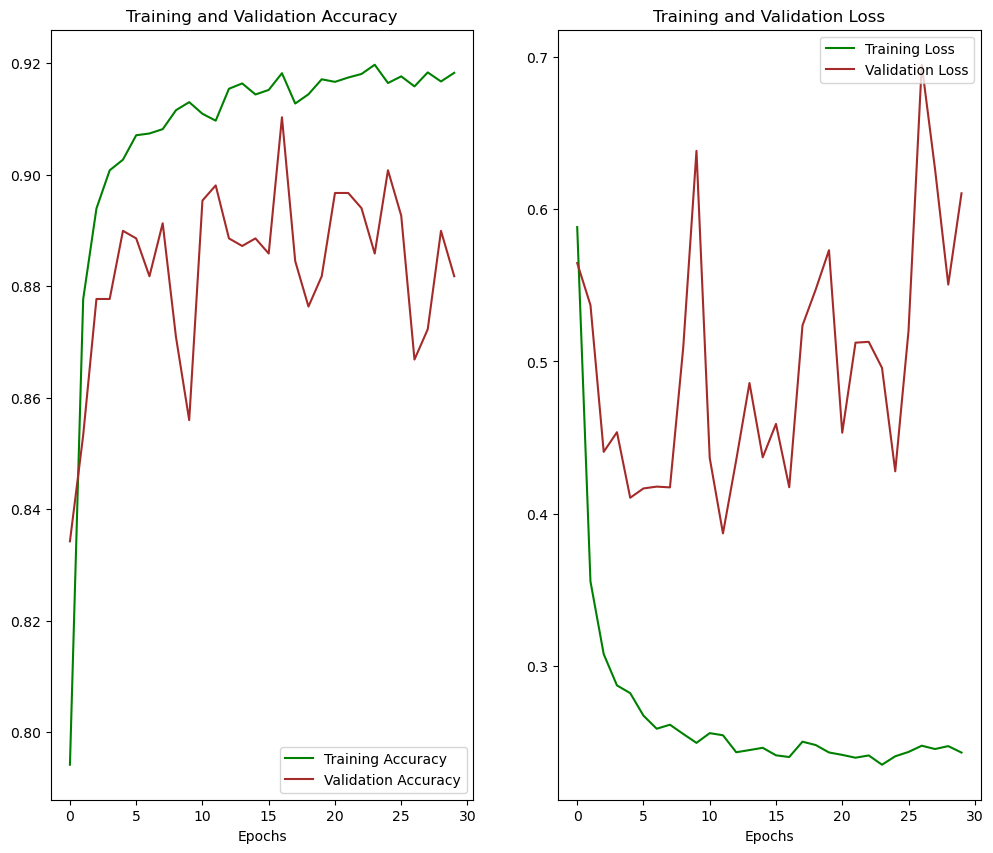

In [16]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 10))

plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy', color='green')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy', color='brown')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')  # Adding x-axis label

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss', color='green')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss', color='brown')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')  # Adding x-axis label

plt.savefig("InceptionV3_Accuracy_and_Loss_Rice_Pest_aug.png", bbox_inches='tight', dpi=2000)
plt.show()


In [17]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    print (predictions)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence
    print(predicted_class, confidence)

first image to predict
actual label: Demsel Fly
1/1 [==============================] - 1s 919ms/step
predicted label: Demsel Fly


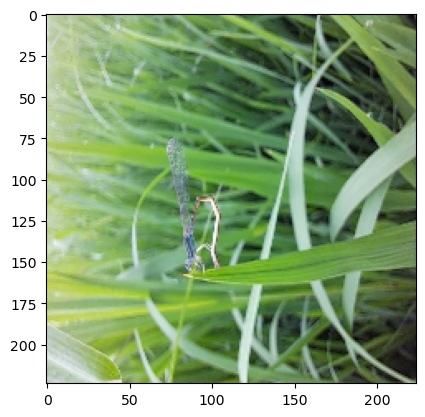

In [18]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

1/1 [==============================] - 1s 879ms/step


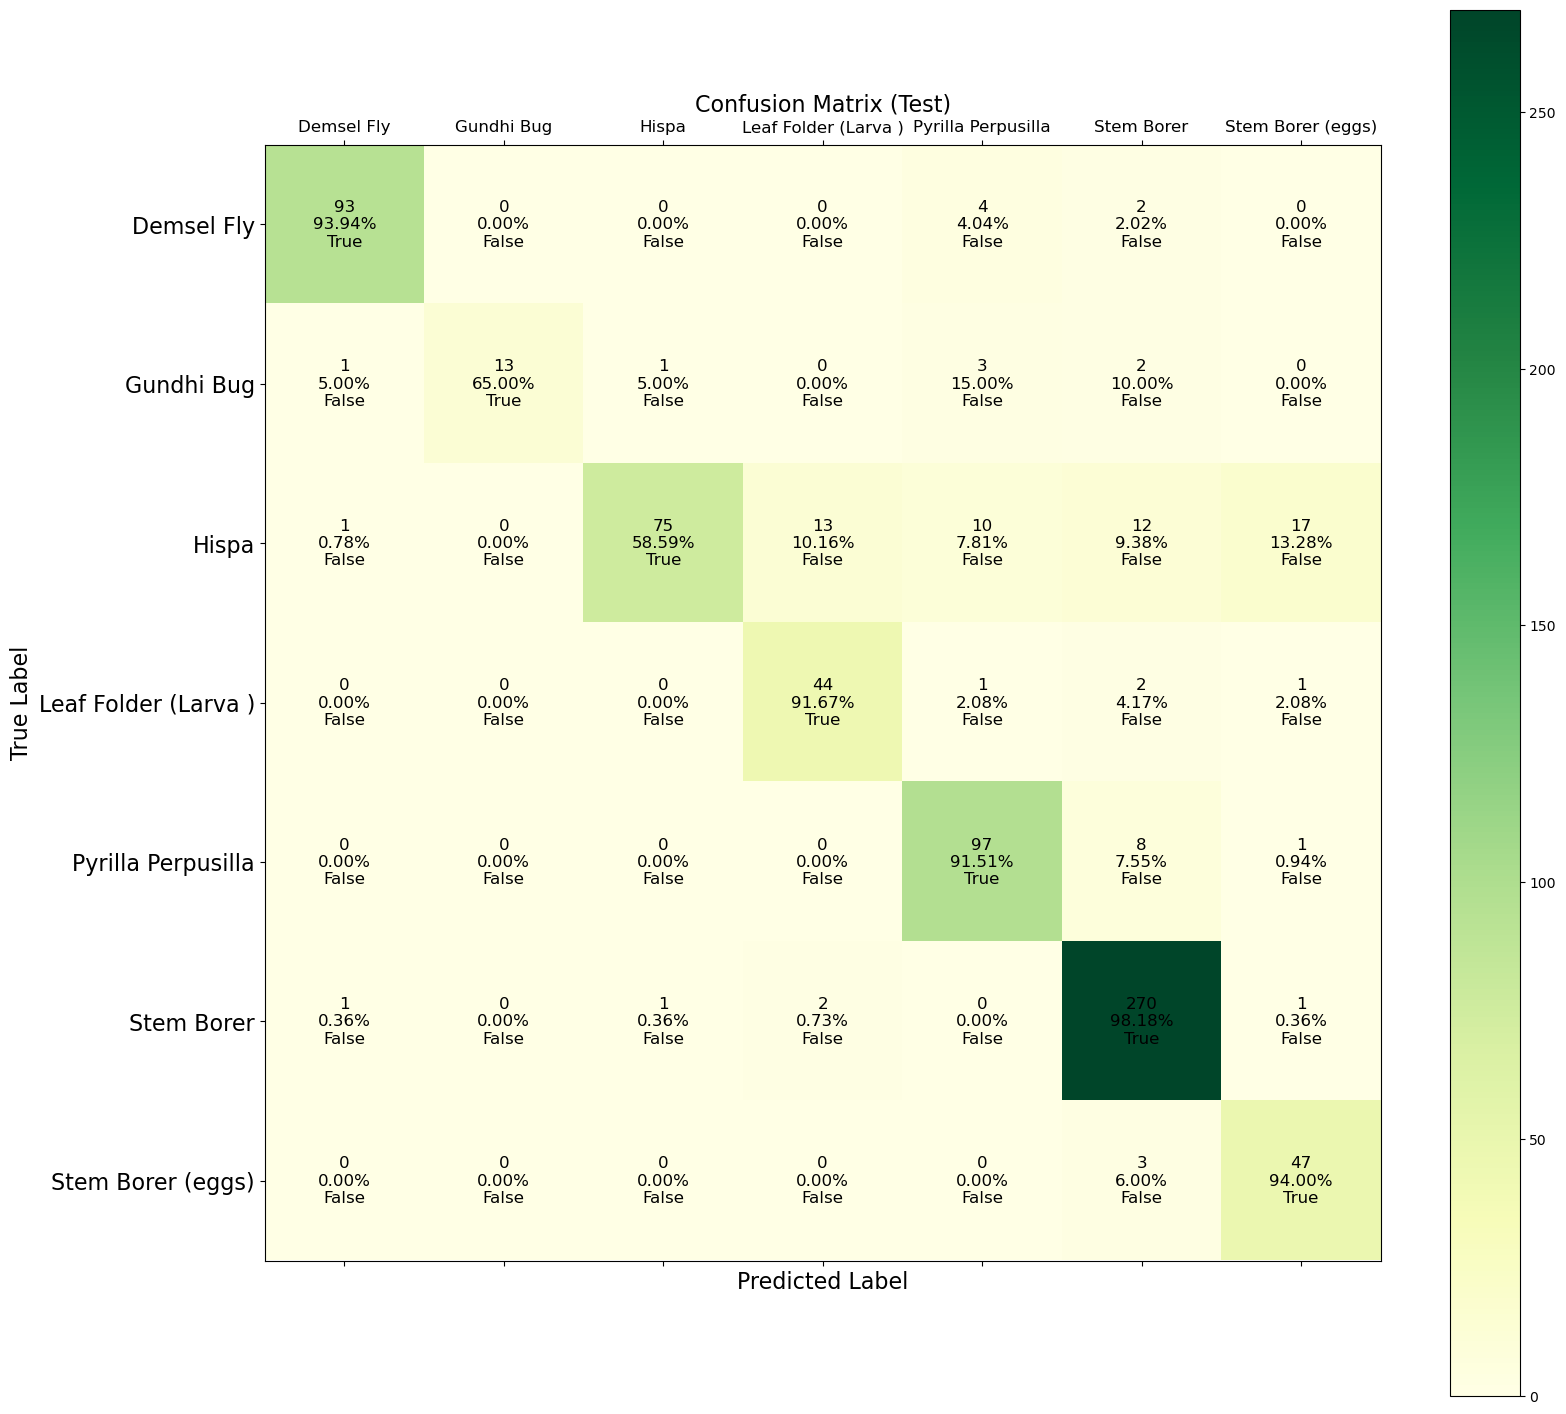

In [19]:
import pandas as pd
# Initialize empty lists to store true and predicted labels
y_true = []
y_pred = []

# Iterate over the test dataset to obtain true and predicted labels
for images_batch, labels_batch in test_ds:
    batch_predictions = model.predict(images_batch)
    y_true.extend(labels_batch)  # Use labels directly without argmax
    y_pred.extend(np.argmax(batch_predictions, axis=1))


# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Map class indices to class names
class_names = ['Demsel Fly',
 'Gundhi Bug',
 'Hispa',
 'Leaf Folder (Larva )',
 'Pyrilla Perpusilla',
 'Stem Borer',
 'Stem Borer (eggs)']

# Calculate confidence percentages
confidence_percentages = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

# Map indices to class names for actual and predicted labels
y_true_names = [class_names[i] for i in y_true]
y_pred_names = [class_names[i] for i in y_pred]

# Create a DataFrame to store results
results_df = pd.DataFrame({
    'Actual Label': y_true_names,
    'Predicted Label': y_pred_names,
    'Confidence Percentage': [confidence_percentages[y, x] * 100 for x, y in zip(y_pred, y_true)],
    'Wrong Prediction': [1 if (true_label != pred_label) else 0 for true_label, pred_label in zip(y_true, y_pred)]
})

# Display the confusion matrix with gaps between class labels
fig, ax = plt.subplots(figsize=(18, 18))
cax = ax.matshow(conf_matrix, cmap=plt.cm.YlGn)

# Add a little gap between the axis ticks for better readability
ax.set_xticks(np.arange(len(class_names)))
ax.set_yticks(np.arange(len(class_names)))
ax.set_xticklabels(class_names, fontsize=12)  # Set font size for x-axis labels
ax.set_yticklabels(class_names, fontsize=16)  # Set font size for y-axis labels
plt.xticks(rotation=0, ha='center')

# Add numbers and confidence percentages to the matrix blocks
for i in range(len(class_names)):
    for j in range(len(class_names)):
        text = f'{conf_matrix[i, j]:.0f}\n{confidence_percentages[i, j]*100:.2f}%'
        if i == j:  # Correct prediction
            text += '\nTrue'
        else:
            text += '\nFalse'
        plt.text(j, i, text, ha='center', va='center', color='black', fontsize=12)  # Set font size and color for text

# Add colorbar
plt.colorbar(cax)

plt.title("Confusion Matrix (Test)", fontsize=16)  # Set title font size
plt.xlabel("Predicted Label", fontsize=16)  # Set x-axis label font size
plt.ylabel("True Label", fontsize=16)  # Set y-axis label font size
plt.savefig("InceptionV3_ Confusion Matrix Test_Rice_Pest_aug", bbox_inches='tight', dpi=2000)
plt.show()

# Save the results to a CSV file
results_df.to_csv('test_results_InceptionV3_Rice_Pest_aug.csv', index=False)

In [20]:
# Let's assume you have a pre-trained model named 'model'
# Get one batch of images and labels from the test dataset
for test_images, test_labels in test_ds.take(1):
    break

# Make predictions
logits = model(test_images)
test_predictions = tf.argmax(logits, axis=1)

# Convert to numpy for easier handling in plotting
test_images = test_images.numpy()
test_labels = test_labels.numpy()
test_predictions = test_predictions.numpy()

In [21]:
test_images = []
test_labels = []
predictions = []

# Assuming 'test_ds' is your testing dataset
for images, labels in test_ds.take(-1):  # Take all batches in the dataset
    preds = model.predict(images)
    predictions.extend(np.argmax(preds, axis=1))
    test_images.extend(images.numpy())
    test_labels.extend(labels.numpy())

# Convert lists to numpy arrays for easier handling
test_images = np.array(test_images)
test_labels = np.array(test_labels)
test_predictions = np.array(predictions)

1/1 [==============================] - 0s 28ms/step


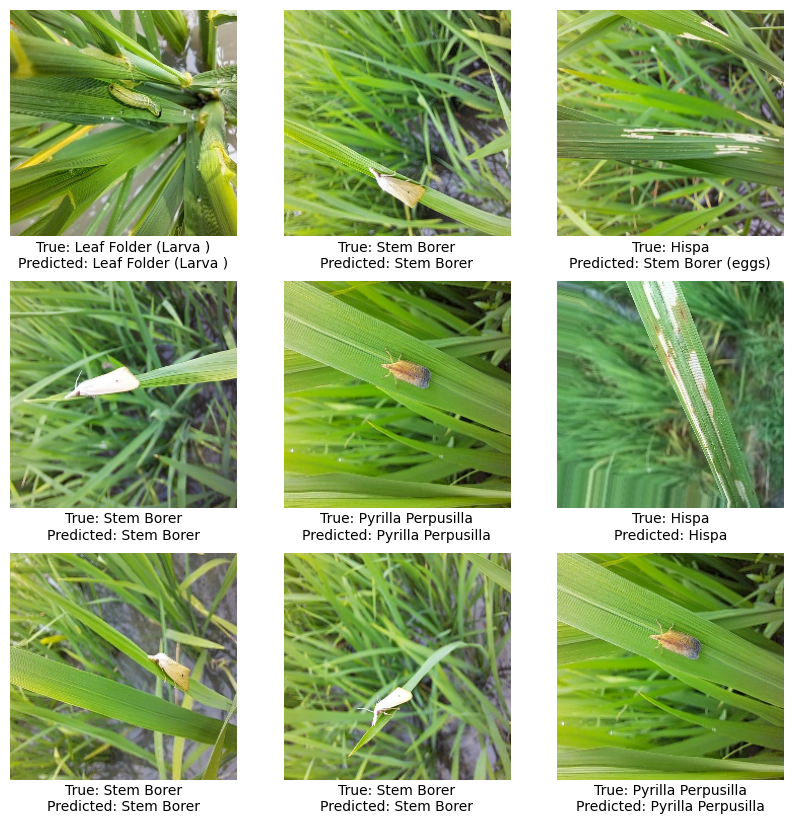

In [22]:
# Select random indices
random_indices = np.random.choice(test_images.shape[0], 9, replace=False)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_indices):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[idx].astype("uint8"))
    true_label = class_names[test_labels[idx]]
    predicted_label = class_names[test_predictions[idx]]
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}", pad=10,fontsize=10, y=-0.2)
    plt.axis("off")

plt.savefig("InceptionV3_True and Predicted label of Rice_Pest_aug",bbox_inches='tight', dpi=2000)
plt.show()


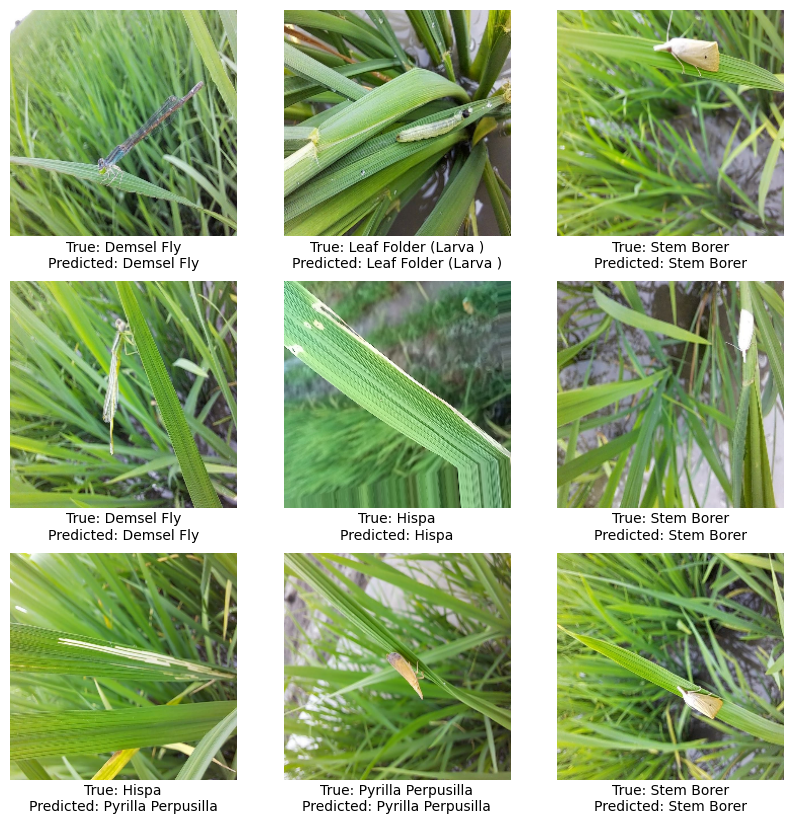

In [23]:
# Select random indices
random_indices = np.random.choice(test_images.shape[0], 9, replace=False)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_indices):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[idx].astype("uint8"))
    true_label = class_names[test_labels[idx]]
    predicted_label = class_names[test_predictions[idx]]
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}", pad=10, fontsize=10, y=-0.2)  # Adjust y position
    plt.axis("off")

plt.savefig("InceptionV3_True and Predicted label of Rice_Pest_aug1", bbox_inches='tight', dpi=2000)
plt.show()

In [24]:
# Assuming `model` is your trained model

test_labels = []
test_predictions = []

for images, labels in test_ds:
    preds = model.predict(images)
    test_predictions.extend(np.argmax(preds, axis=1))
    test_labels.extend(labels.numpy())

test_labels = np.array(test_labels)
test_predictions = np.array(test_predictions)

# Assuming class_names are extracted correctly from the dataset directory
class_names = test_ds.class_names

1/1 [==============================] - 0s 30ms/step


In [25]:
from sklearn.metrics import precision_recall_fscore_support

In [26]:
# Compute precision, recall, f1 score, and other metrics
precision, recall, f1_score, support = precision_recall_fscore_support(test_labels, test_predictions, average=None, labels=np.arange(len(class_names)))
micro_precision, micro_recall, micro_f1_score, _ = precision_recall_fscore_support(test_labels, test_predictions, average='micro')
macro_precision, macro_recall, macro_f1_score, _ = precision_recall_fscore_support(test_labels, test_predictions, average='macro')
weighted_precision, weighted_recall, weighted_f1_score, _ = precision_recall_fscore_support(test_labels, test_predictions, average='weighted')

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    'Class': class_names,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score
})

# Add micro, macro, and weighted averages to the DataFrame
metrics_df = metrics_df.append({
    'Class': 'Micro Average',
    'Precision': micro_precision,
    'Recall': micro_recall,
    'F1 Score': micro_f1_score
}, ignore_index=True)

metrics_df = metrics_df.append({
    'Class': 'Macro Average',
    'Precision': macro_precision,
    'Recall': macro_recall,
    'F1 Score': macro_f1_score
}, ignore_index=True)

metrics_df = metrics_df.append({
    'Class': 'Weighted Average',
    'Precision': weighted_precision,
    'Recall': weighted_recall,
    'F1 Score': weighted_f1_score
}, ignore_index=True)

# Save the DataFrame to a CSV file
metrics_df.to_csv('metrics_InceptionV3_Rice_Pest_aug.csv', index=False)

# Print the DataFrame
print(metrics_df)

                  Class  Precision    Recall  F1 Score
0            Demsel Fly   0.968750  0.939394  0.953846
1            Gundhi Bug   1.000000  0.650000  0.787879
2                 Hispa   0.974026  0.585938  0.731707
3  Leaf Folder (Larva )   0.745763  0.916667  0.822430
4    Pyrilla Perpusilla   0.843478  0.915094  0.877828
5            Stem Borer   0.903010  0.981818  0.940767
6     Stem Borer (eggs)   0.701493  0.940000  0.803419
7         Micro Average   0.880165  0.880165  0.880165
8         Macro Average   0.876646  0.846987  0.845411
9      Weighted Average   0.894200  0.880165  0.875007


C:\Users\Hp\AppData\Local\Temp\ipykernel_9144\651365686.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({
C:\Users\Hp\AppData\Local\Temp\ipykernel_9144\651365686.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({
C:\Users\Hp\AppData\Local\Temp\ipykernel_9144\651365686.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({


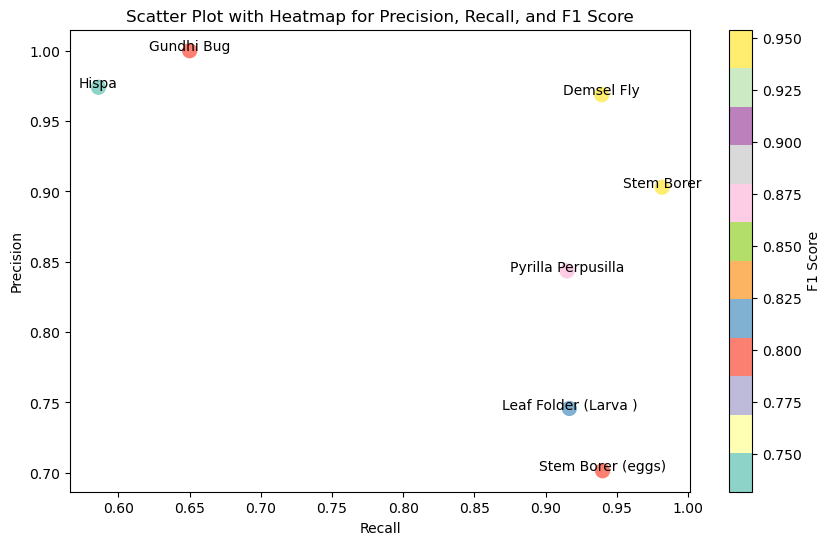

In [27]:
# Create a scatter plot with heatmaps and labels
plt.figure(figsize=(10, 6))
scatter = plt.scatter(recall, precision, c=f1_score, cmap='Set3', s=100)  # Adjusted the size
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.colorbar(label='F1 Score')

# Add labels for each point in the scatter plot
for i, label in enumerate(class_names):
    plt.text(recall[i], precision[i], label, fontsize=10, ha='center')

plt.title('Scatter Plot with Heatmap for Precision, Recall, and F1 Score')
plt.savefig("InceptionV3_Rice_Pest_aug_Scatter Plot with Heatmap for Precision, Recall, and F1 Score", bbox_inches= 'tight', dpi= 2000)
plt.show()

1/1 [==============================] - 0s 28ms/step


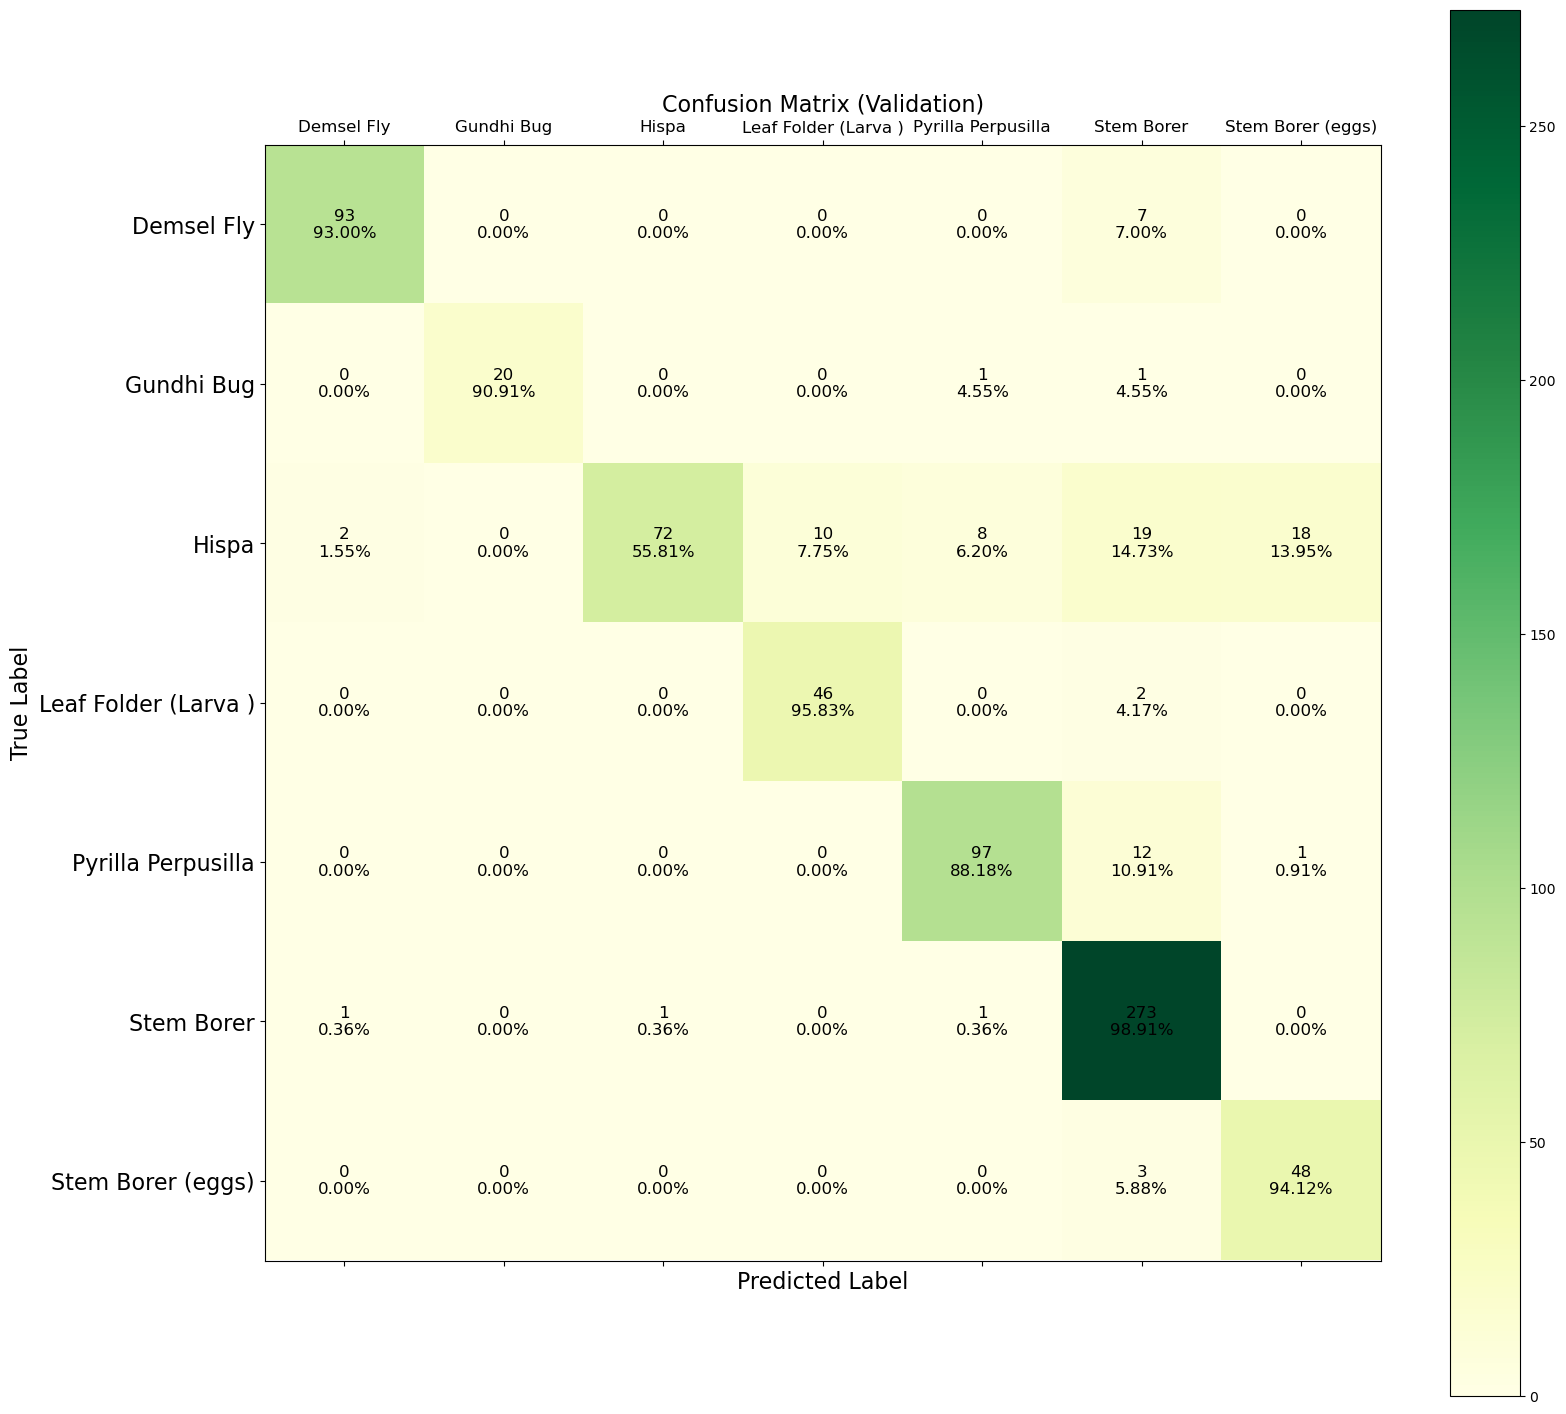

In [28]:
# Initialize empty lists to store true and predicted labels
y_true = []
y_pred = []

# Iterate over the validation dataset to obtain true and predicted labels
for images_batch, labels_batch in val_ds:
    batch_predictions = model.predict(images_batch)
    y_true.extend(labels_batch.numpy())  # Convert to numpy array if necessary
    y_pred.extend(np.argmax(batch_predictions, axis=1))

# Ensure that y_true and y_pred have the same length
if len(y_true) != len(y_pred):
    print(f"Length mismatch: y_true has {len(y_true)} elements, y_pred has {len(y_pred)} elements")
else:
    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Map class indices to class names
    class_names = ['Demsel Fly',
 'Gundhi Bug',
 'Hispa',
 'Leaf Folder (Larva )',
 'Pyrilla Perpusilla',
 'Stem Borer',
 'Stem Borer (eggs)']

    # Calculate confidence percentages
    confidence_percentages = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

    # Map indices to class names for actual and predicted labels
    y_true_names = [class_names[i] for i in y_true]
    y_pred_names = [class_names[i] for i in y_pred]

    # Create a DataFrame to store results
    results_df = pd.DataFrame({
        'Actual Label': y_true_names,
        'Predicted Label': y_pred_names,
        'Confidence Percentage': [confidence_percentages[y, x] * 100 for x, y in zip(y_pred, y_true)],
        'Wrong Prediction': [1 if (true_label != pred_label) else 0 for true_label, pred_label in zip(y_true, y_pred)]
    })

    # Display the confusion matrix with gaps between class labels
    fig, ax = plt.subplots(figsize=(18, 18))
    cax = ax.matshow(conf_matrix, cmap=plt.cm.YlGn) #BuGn, BuPu, Accent,Wistia

    # Add a little gap between the axis ticks for better readability
    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    ax.set_xticklabels(class_names, fontsize=12)
    ax.set_yticklabels(class_names, fontsize=16)
    plt.xticks(rotation=0, ha='center')

    # Add numbers and confidence percentages to the matrix blocks
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            text = f'{conf_matrix[i, j]:.0f}\n{confidence_percentages[i, j]*100:.2f}%'
            if i == j:  # Correct prediction
                plt.text(j, i, text, ha='center', va='center', color='black', fontsize=12)
            else:  # Incorrect prediction
                plt.text(j, i, text, ha='center', va='center', color='black', fontsize=12)

    # Add colorbar
    plt.colorbar(cax)

    plt.title("Confusion Matrix (Validation)", fontsize=16)
    plt.xlabel("Predicted Label", fontsize=16)
    plt.ylabel("True Label", fontsize=16)
    plt.savefig("InceptionV3_Rice_Pest_aug_Confusion_Matrix_Validation.png", bbox_inches='tight', dpi=2000)
    plt.show()

    # Save the results to a CSV file
    results_df.to_csv('Rice_valid_results_InceptionV3_Pest_aug.csv', index=False)


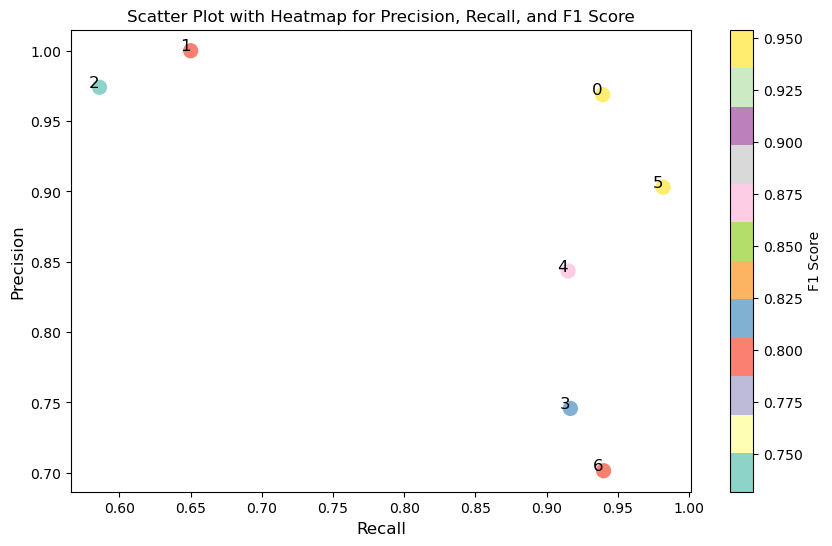

In [29]:
# Assuming recall, precision, and f1_score are already computed
# and class_names is a list of class names

# Create a mapping from class index to class name
class_mapping = {i: class_name for i, class_name in enumerate(class_names)}

# Create a scatter plot with heatmap and labels
plt.figure(figsize=(10, 6))
scatter = plt.scatter(recall, precision, c=f1_score, cmap='Set3', s=100)
plt.xlabel('Recall',fontsize=12)
plt.ylabel('Precision',fontsize=12)
plt.colorbar(label='F1 Score')

# Add numbered labels for each point in the scatter plot
for i in range(len(class_names)):
    plt.text(recall[i], precision[i], str(i), fontsize=12, ha='right')

# Create a legend for the mapping of numbers to class names
handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'{i}: {class_name}',
                      markersize=10, markerfacecolor='gray') for i, class_name in class_mapping.items()]
#plt.legend(handles=handles, title='Class Mapping', bbox_to_anchor=(1.05, 1), loc='best')

plt.title('Scatter Plot with Heatmap for Precision, Recall, and F1 Score')
plt.savefig("InceptionV3_Rice_Pest_aug_Scatter_Plot_with_Heatmap_for_Precision_Recall_and_F1_Score1",bbox_inches='tight', dpi=2000)
plt.show()

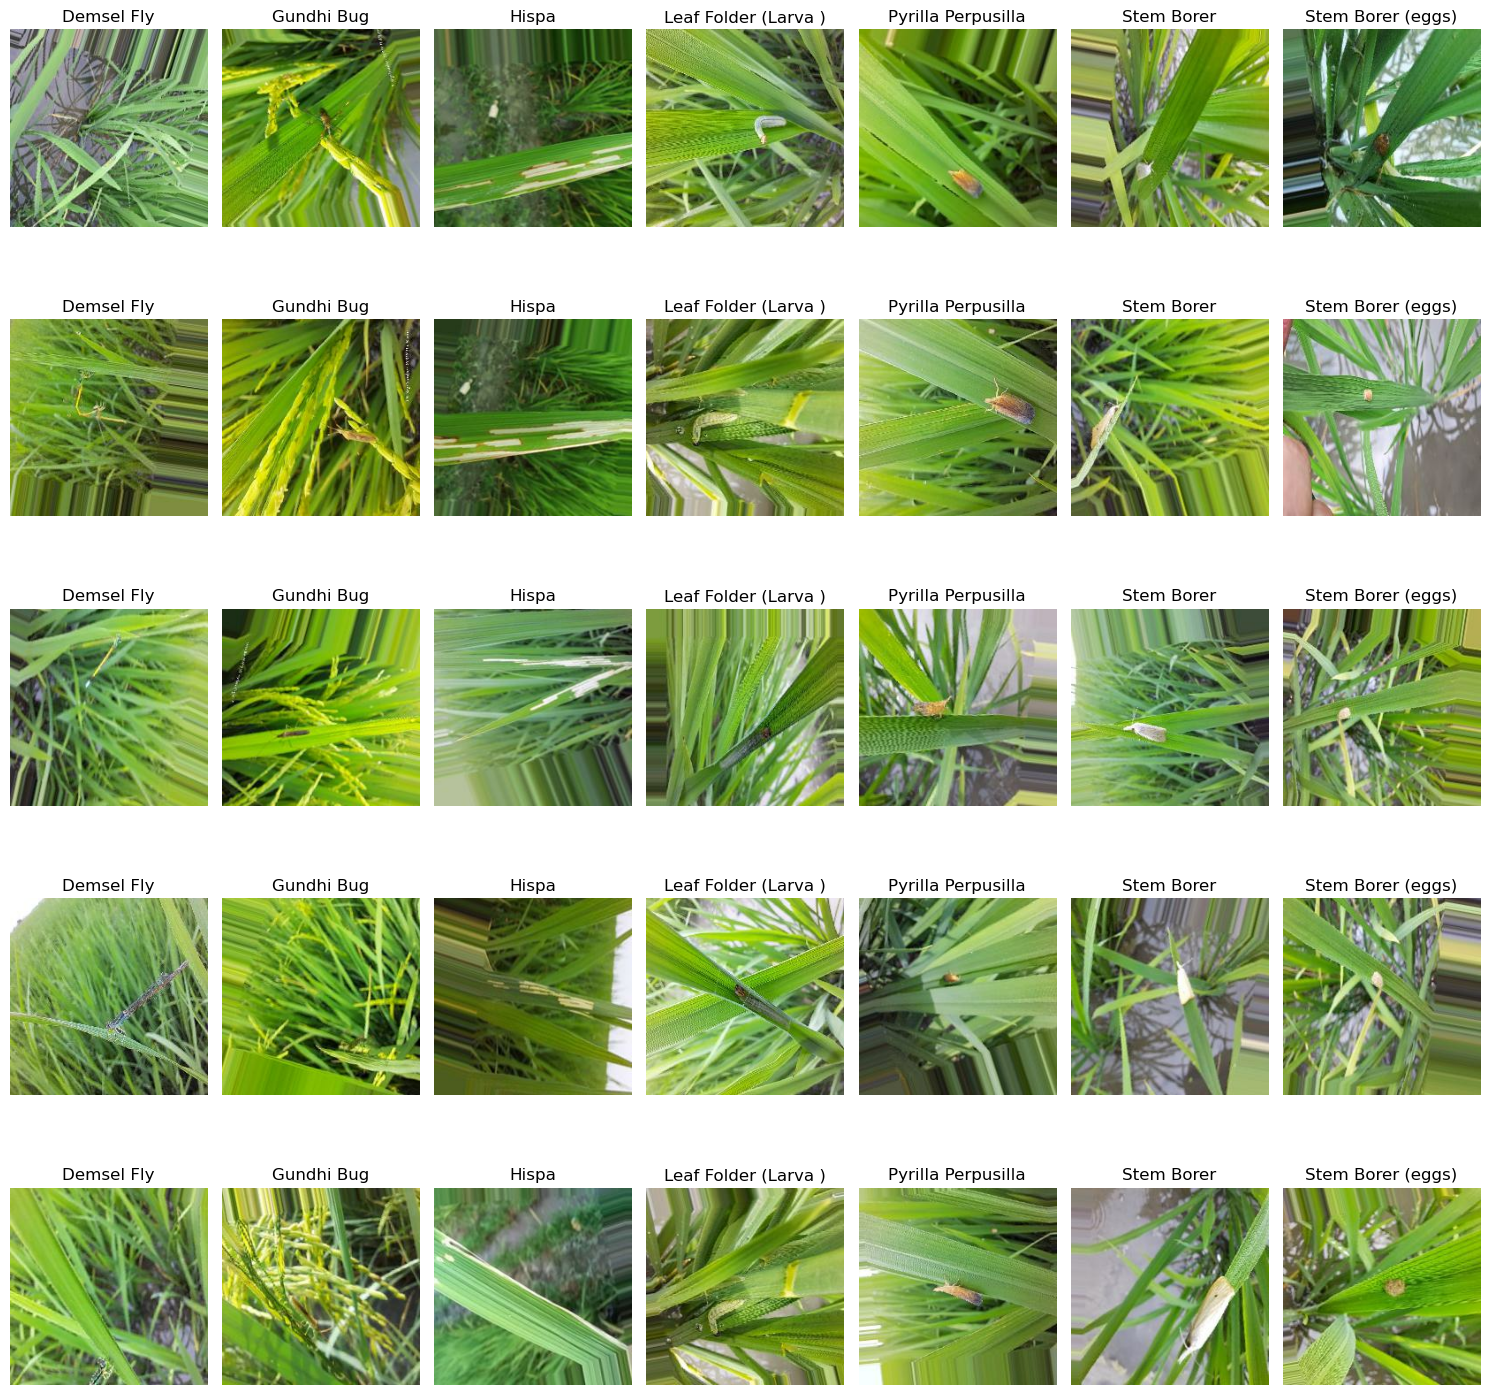

In [30]:
# Define the number of images to display for each class
num_images_per_class = 5

# Initialize counters to keep track of the number of images per class
class_counts = {class_name: 0 for class_name in class_names}

# Create a subplot grid
num_rows = num_images_per_class
num_cols = len(class_names)
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Iterate through the train_ds dataset
for images_batch, labels_batch in train_ds:
    for image, label in zip(images_batch, labels_batch):
        class_name = class_names[label.numpy()]
        if class_counts[class_name] < num_images_per_class:
            row = class_counts[class_name]
            col = class_names.index(class_name)
            ax = axs[row, col]
            ax.imshow(image.numpy().astype("uint8"))
            ax.set_title(class_name)
            ax.axis("off")
            class_counts[class_name] += 1

        # Check if all classes have reached the desired number of images
        if all(count == num_images_per_class for count in class_counts.values()):
            break

    # Check if all classes have reached the desired number of images
    if all(count == num_images_per_class for count in class_counts.values()):
        break

# Set class labels at the bottom
for ax, class_name in zip(axs[-1], class_names):
    ax.set_xlabel(class_name, fontsize=20)

plt.tight_layout()
plt.savefig("Rice Diseases Actual Images train set from each class", bbox_inches='tight', dpi=2000)
plt.show()
